In [77]:
import numpy as np
import requests
from datetime import datetime 
import pandas as pd
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import numpy as np
import xarray as xr
import pandas as pd
from glob import glob

# Libraries for plotting and visualising data
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

In [78]:
os.chdir('/Users/max/Deep_Sky/GitHub/Deep_Sky_Data_Science/viz/')

DATADIR = '../data/copernicus_data/'

In [86]:
data_ds = xr.open_mfdataset(f'{DATADIR}/preprocessed/cmip6_agg*.nc')
data_ds.load()

<xarray.Dataset>
Dimensions:     (experiment: 4, model: 2, year: 251)
Coordinates:
  * experiment  (experiment) object 'historical' 'ssp126' 'ssp245' 'ssp585'
    height      float64 1.5
  * year        (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * model       (model) object 'HadGEM3-GC31-LL' 'UKESM1-0-LL'
Data variables:
    tas         (experiment, model, year) float64 13.58 13.62 ... 20.48 20.63

In [87]:
data = data_ds['tas']
#print(data.coords['model'])

In [88]:
# MDK something is going wrong, maybe at this point, which causes the projections to go too high in temperature in the plot

from unittest import skip

def convert_to_anomaly(data, start_year, end_year):
    '''
    Convert temperature data to anomalies by subtracting the mean temperature
    of a specific period.
    '''
    mean_temp = data.sel(year=slice(start_year, end_year)).mean(dim=None, skipna=True)
    print(mean_temp)
    anomaly = data - mean_temp
    return anomaly

# Use the function to convert the 'tas' data to anomalies
data = convert_to_anomaly(data, 1850, 1900)

<xarray.DataArray 'tas' ()>
array(13.49162644)
Coordinates:
    height   float64 1.5


In [89]:
data_90 = data.quantile(0.9, dim='model')
data_10 = data.quantile(0.1, dim='model')
data_50 = data.quantile(0.5, dim='model')

print(data_10.mean().values)
print(data_50.mean().values)
print(data_90.mean().values)
data.sel(experiment = 'ssp585')


1.768568694914104
1.8602192683974772
1.9518698418808516


/Users/max/.pyenv/versions/3.12.1/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning:

All-NaN slice encountered



<xarray.DataArray 'tas' (model: 2, year: 251)>
array([[       nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
...
               nan,        nan,        nan,        nan,        nan,
               nan,        nan,        nan,        nan,        nan,
        1.01554792, 1.04955733, 0.96412633, 1.1313312 , 1.28985307,
        1.24425323, 1.2514518 , 1.40747264, 1.42392434, 1.34229591,
        1.41837859, 1.52609102, 1.7302524 , 1.6586206 , 1.63032028,
        1.80166533, 1.84597229, 1.93159879, 2.06482347, 2.13468447,
        2.13942066, 2.19848923, 2.22402609, 2.26186091, 2.37597524,
        2.57205026, 2.58459314, 2.54292552, 2.62066243, 2.61004941,
        2.64660349, 2.85360244, 2.9837106 , 3.0026819 , 2.98519077,
        3.08253667, 3.34886098, 3.38992447, 3.3239241 , 3.39792461,
        3.57985868, 3.59622685, 3.63073658, 3.56704697, 3.76897037,
        3.99325273, 3.98577757, 4.04801976, 4.22496907, 4.30166229,
        4.35890508, 4.39009586, 4.49743123, 4.41825355, 4.5905149 ,
        4.83274537, 4.84154041, 5.04649548, 5.00814602, 4.80279028,
        4.9790876 , 5.28842229, 5.26251484, 5.34306841, 5.44769871,
        5.55175411, 5.6009782 , 5.67715184, 5.73373076, 5.87624344,
        5.92164553, 5.9277841 , 6.08641545, 6.20757788, 6.49032673,
        6.42977318, 6.40066699, 6.50337863, 6.52979547, 6.67783384,
        6.92101489, 6.99839323, 6.99659185, 7.1617806 , 6.9926329 ,
        7.1415599 ]])
Coordinates:
    experiment  <U6 'ssp585'
    height      float64 1.5
  * year        (year) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
  * model       (model) object 'HadGEM3-GC31-LL' 'UKESM1-0-LL'

In [90]:
experiments = ['historical', 'ssp126', 'ssp245', 'ssp585']


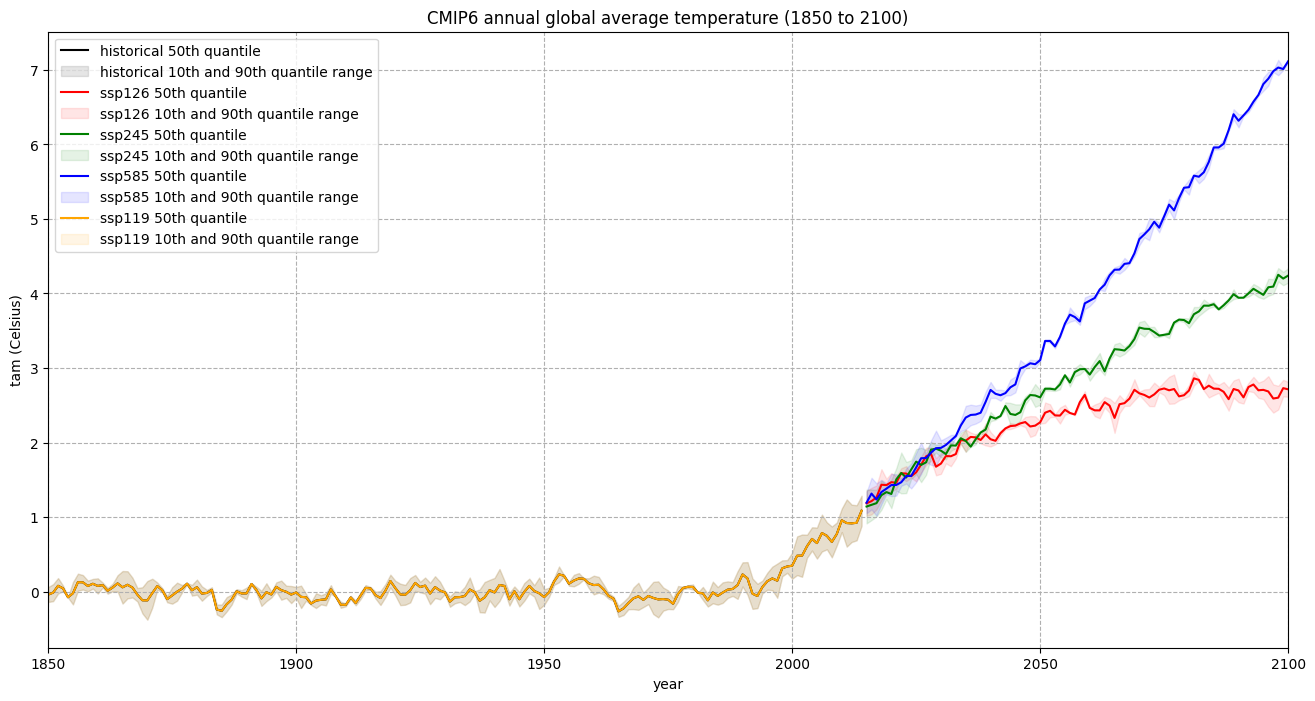

In [92]:
from cProfile import label


fig, ax = plt.subplots(1, 1, figsize = (16, 8))

colours = ['black','red','green','blue']
for i in np.arange(len(experiments)):
    ax.plot(data_50.year, data_50[i,:], color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 50th quantile')
    ax.fill_between(data_50.year, data_90[i,:], data_10[i,:], alpha=0.1, color=f'{colours[i]}', 
            label=f'{data_50.experiment[i].values} 10th and 90th quantile range')

ax.plot(data_50.year, data_50[0,:], color='orange', label='ssp119 50th quantile')
ax.fill_between(data_50.year, data_90[0,:], data_10[0,:], alpha=0.1, color='orange', label='ssp119 10th and 90th quantile range')


ax.set_xlim(1850,2100)
ax.set_title('CMIP6 annual global average temperature (1850 to 2100)')
ax.set_ylabel('tam (Celsius)')
ax.set_xlabel('year')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
ax.grid(linestyle='--')

fig.savefig(f'{DATADIR}CMIP6_annual_global_tas.png')

In [93]:
tipping_points = pd.read_csv('../data/McKay_Tipping_Points/tipping_points_for_viz.csv')
tipping_points = tipping_points.dropna(subset=['Central_Estimate'])
tipping_points


,Tipping_Point,Central_Estimate,Min,Max
0,Greenland Ice Sheet Collapse,1.5,0.8,3.0
1,West Antarctic Ice Sheet Collapse,1.5,1.0,3.0
2,East Antarctic Subglacial Basins Collapse,3.0,2.0,6.0
3,Amazon Rainforest Dieback,3.5,2.0,6.0
4,Atlantic M.O. Circulation Collapse,4.0,1.4,8.0
5,East Antarctic Ice Sheet Collapse,7.5,5.0,10.0
6,Low-latitude Coral Reefs Die-off,1.5,1.0,2.0
7,Boreal Permafrost Abrupt Thaw,1.5,1.0,2.3
8,Barents Sea Ice Abrupt Loss,1.6,1.5,1.7
9,Mountain Glaciers Loss,2.0,1.5,3.0


In [94]:
def find_year(temperature, experiment):
    year_reached = data_50.sel(experiment = experiment).year.where(data_50.sel(experiment = experiment) >= temperature).min().values
    return year_reached

In [95]:
tipping_points['year'] = tipping_points['Min'].apply(lambda x: find_year(x, 'ssp245'))    
tipping_points = tipping_points.dropna(subset=['year'])
tipping_points = tipping_points.sort_values('year', ascending=False).reset_index()



In [96]:
y_min = min(data_50.min(), data_10.min())
y_min

<xarray.DataArray 'tas' ()>
array(-0.37697784)
Coordinates:
    quantile  float64 0.1

In [97]:
import plotly.graph_objects as go

projections_fig = go.Figure()

y_min = -1
y_max = float(max(data_90.max(), data_50.max()).values)

colours = ['black','red','green','blue']
fill_colours = ['rgba(0,0,0,0.3)','rgba(255,0,0,0.3)','rgba(0,128,0,0.3)','rgba(0,0,255,0.3)']
for i in np.arange(len(experiments)):
    projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_50[i,:], mode='lines', name=f'{data_50.experiment[i].values} 50th quantile', line=dict(color=f'{colours[i]}')))
    projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_90[i,:], fill=None, mode='lines', line_color='rgba(0,0,0,0)', showlegend=False))
    projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_10[i,:], fill='tonexty', mode='lines', line_color='rgba(0,0,0,0)', fillcolor=f'{fill_colours[i]}', name=f'{data_50.experiment[i].values} 10th and 90th quantile range'))

projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_50[0,:], mode='lines', name='ssp119 50th quantile', line=dict(color='orange')))
projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_90[0,:], fill=None, mode='lines', line_color='rgba(0,0,0,0)', showlegend=False))
projections_fig.add_trace(go.Scatter(x=data_50.year, y=data_10[0,:], fill='tonexty', mode='lines', line_color='rgba(0,0,0,0)', fillcolor='rgba(255,165,0,0.3)', name='ssp119 10th and 90th quantile range'))

projections_fig.update_layout(
    title='CMIP6 annual global average temperature (1925 to 2100)',
    xaxis_title='',
    yaxis_title='Temperature Anomaly',
    autosize=False,
    width=1200,
    height=500,
    xaxis_range=[1925,2100],
    yaxis_range=[y_min, y_max],
    yaxis2 = dict(range=[0, -10], autorange=False, showgrid=False, zeroline=False),
    showlegend=False
)

# Add a point to the plot for each tipping point
for index, row in tipping_points.iterrows():
    projections_fig.add_trace(go.Scatter(x=[row['year']], y=[row['Min']], mode='markers', 
                            marker=dict(size=7, symbol='x', color='black'), 
                            name=row['Tipping_Point'],
                            hoverinfo='none'))  
    
    # Add a vertical line
    projections_fig.add_shape(
        type="line",
        x0=row['year'], y0=row['Min'], x1=row['year'], y1=y_min,
        line=dict(color="gray", width=1, dash="dot")
    )

projections_fig.show()
#fig.write_image(f'{DATADIR}CMIP6_annual_global_tas.png')

In [98]:
import plotly.graph_objects as go
import numpy as np
from scipy.__config__ import show

# Create a color scale
color_scale = ["white", "red"]

tipping_points_fig = go.Figure()

# Create a 2D array for the heatmap
heatmap = []
for index, row in tipping_points.iterrows():
    # Create a row for the heatmap
    row_values = [None if year < row['year'] else year for year in range(2014, 2101)]
    heatmap.append(row_values)
    
# Add a heatmap
tipping_points_fig.add_trace(go.Heatmap(
    z=heatmap,
    x=np.arange(2014, 2101),
    y=tipping_points['Tipping_Point'],
    colorscale=color_scale,
    colorbar=dict(title="Year"),
    showscale=False
))
    
for index, row in tipping_points.iterrows():
    tipping_points_fig.add_shape(
        type="line",
        x0=row['year']-.5,
        y0= index + 0.5,
        x1= 2100,
        y1= index + 0.5,
        line=dict(
            color="Black",
            width=1,
        ),
        yref='y1'
    )

    # Add a dash-dot vertical line
    tipping_points_fig.add_shape(
        type="line",
        x0=row['year']-0.5,
        y0=index-.5,
        x1=row['year']-0.5,
        y1=len(tipping_points),
        line=dict(
            color="Black",
            width=1,
            dash="dashdot",
        ),
        yref='y1'
    )
    
tipping_points_fig.update_layout(
    title='',
    xaxis_title='',
    yaxis_title='Tipping Point',
    autosize=False,
    width=1200,
    height=500,
    xaxis_range=[2014, 2100],
    showlegend=False,
    xaxis=dict(showgrid=False),
    yaxis=dict(showgrid=False)
)

tipping_points_fig.show()

In [76]:
pio.write_html(projections_fig, '../figures/cmip6_projections.html')
pio.write_image(projections_fig, '../figures/cmip6_projections.png')

pio.write_html(tipping_points_fig, '../figures/tipping_points_2.html')
pio.write_image(tipping_points_fig, '../figures/tipping_points_2.png')